In [8]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('./data.csv') 
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values


firstDF = df[y == -1]
secondDF = df[y == 1]

In [10]:
 
def hypothesis(x, w):
    return np.sign(np.dot(w, x))

 
# Make predictions on all data points
# and return the ones that are misclassified.
def predict(hypothesis_function, X, y, w):  
    predictions = np.apply_along_axis(hypothesis_function, 1, X, w)
    misclassified = X[y != predictions]
    return misclassified

def pick_one_from(misclassified_examples, X, y):
    np.random.shuffle(misclassified_examples)
    x = misclassified_examples[0]
    index = np.where(np.all(X == x, axis=1))
    return x, y[index]



def perceptron_learning_algorithm(X, y):
    w = np.random.rand(3) # can also be initialized at zero.
    misclassified_examples = predict(hypothesis, X, y, w)
    while misclassified_examples.any():
        x, expected_y = pick_one_from(misclassified_examples, X, y)
        w = w + x * expected_y # update rule
        misclassified_examples = predict(hypothesis, X, y, w)
    return w


In [11]:
X_augmented = np.c_[np.ones(X.shape[0]), X]
w = perceptron_learning_algorithm(X_augmented, y)

In [12]:
print(w)
b = w[0]
w = w[1:]

[-93.31101152   2.66379148  13.69241442]


In [13]:
y.shape[0]

31

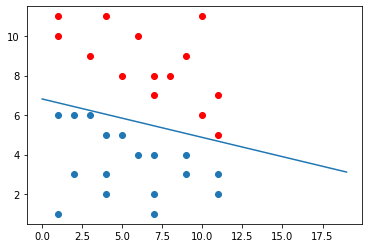

In [14]:
plt.scatter(firstDF.x, firstDF.y)
plt.scatter(secondDF.x, secondDF.y, c='r')
x = range(0, 20)
y=[-1 * w[0]/w[1]*x-b/w[1] for x in x]
plt.plot(x, y);